## Pima Diabetes - EDA (Exploratory Data Analysis)

### Description of Pima Diabetes dataset
#### Data Set Information:
Several constraints were placed on the selection of these instances from a larger database. In
particular, all patients here are females at least 21 years old of Pima Indian heritage. ADAP is
an adaptive learning routine that generates and executes digital analogy of perceptron-like
devices. It is a unique algorithm; see the paper for details.

#### Attribute Information:
- <b> Pregnancies </b> : Number of times pregnant 

- <b> Glucose </b>: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (mg/dl) A 2-hour value between 140 and 200 mg/dL (7.8 and 11.1 mmol/L) is called impaired glucose tolerance. This is called "pre- diabetes." It means you are at increased risk of developing diabetes over time. A glucose level of 200 mg/dL (11.1 mmol/L) or higher is used to diagnose diabetes.

- <b> Blood Pressure </b> : Diastolic blood pressure (mm Hg) : If Diastolic B.P > 90 means High B.P (High Probability of Diabetes) Diastolic B.P < 60 means low B.P (Less Probability of Diabetes)

- <b> Skin Thickness </b> : Triceps skin fold thickness (mm) – A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.
- <b> Insulin </b> : 2-Hour serum insulin (mu U/ml) Normal Insulin Level 16-166 mIU/L Values above this range can be alarming.
- <b> BMI </b> : Body mass index (weight in kg/(height in m)^2), Body Mass Index of 18.5 to 25 is within the normal range BMI between 25 and 30 then it falls within the overweight range. A BMI of 30 or over falls within the obese range.
- <b> Diabetes Pedigree Function </b>: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.
- <b> Age </b> (years) 
- <b> Outcome </b> :  Class variable (0 or 1), where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes The dependent variable is whether the patient is having diabetes or not.


### 1. Import Libraries
First we import necessary packages like pandas, numpy, seaborn, matplotlib etc

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)

### 2. Read Dataset

In [2]:
pima_df = pd.read_csv("../../dataset/diabetes.csv")

### 3. Sneak-peek at the data:

Let us look at the top few rows to understand the variables and the nature of data

In [3]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 9 columns and 768 rows in the dataset

### 4. Statictical Summary

Let us look at the distribution of data in each of these columns using summary statictics

In [5]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### 5. Categorical and Numerical Variables

In [6]:
# Categotical and Numeric columns

print("Numeric Columns:",pima_df.select_dtypes(exclude=['object']).columns)

print("\nCategorical Columns:",pima_df.select_dtypes(include=['object']).columns)


Numeric Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Categorical Columns: Index([], dtype='object')


### 6. Check for Missing Values

So let us check and count the number of missing values in each of the columns. Any one of these options can be used

In [7]:
def missing_values(df):
    return df.isnull().values.any()

pima_df.apply(missing_values)

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
labels = []
values = []
for col in pima_df.columns:
    labels.append(col)
    values.append(pima_df[col].isnull().sum())
    print(col, values[-1])

#sns.barplot(labels,values,capsize=0)

Pregnancies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 0


### Inference:

1. There are 9 columns and 768 rows in the dataset
2. All the variables are numerical, there are no categorical variables in the dataset
3. The dataset doesnot have any missing values (NaN).However, looking at the minimum value in summary statistics - there seems to be 0's in below columns 
    - Glucose
    - BloodPressure
    - SkinThickness
    - Insulin
    - BMI
    
### Strategy to handle missing (zero values):
There are multiple ways in which we can handle missing values - 

1. We could drop the rows having zero's in the dataset as zero values in Glucose, BloodPressure , SkinThickness , Insulin, BMI , Age doesnot make sense.
2. We can impute missing values with either mean or median.
3. If the distribution of the column is normal, then we will use mean to impute the missing values
4. If the distribution of the columns id skewed to either left or right, then we will use median to impute the missing values

So first we will see the distribution of the data set against every column, by doing a univariate analysis and then impute the missing values accordingly.

### 7. Univatiate Analaysis

Lets plot the histogram for all the columns to understand the ditribution of the data within each columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002066CE66390>,
      dtype=object)

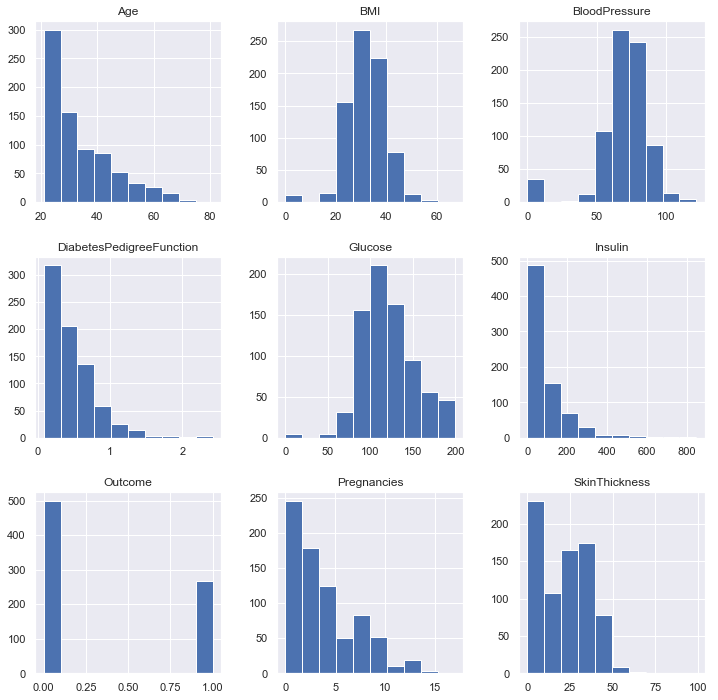

In [9]:
pima_df.hist(figsize=(12,12))

### Inference

#### Skewness
1. Age, DiabetesPedigreeFunction , Pregnancies, Insulin is right skewed.
2. Insulin also has zero's, which can be imputed using median
3. BMI, Blood Pressure, Glucose is have bimodal distribution, however there are few zero values - if we impute those using mean we should be getting normal distribution
4. Skin Thickness also seems to be right skewed and there are zero values - we could use median to impute missing values and get a fairly closer normal distribution

### 8. Zero Replacement
Identify and Replace all the zero values with the mean.

In [10]:
print("Print the number of zero's in each column -")
print('BloodPressure: ',pima_df[pima_df.BloodPressure == 0].BloodPressure.count())
print('Glucose: ',pima_df[pima_df.Glucose == 0].Glucose.count())
print('SkinThickness: ',pima_df[pima_df.SkinThickness == 0].SkinThickness.count())
print('Insulin: ',pima_df[pima_df.Insulin == 0].Insulin.count())
print('BMI: ',pima_df[pima_df.BMI == 0.0].BMI.count())
#print('DiabetesPedigreeFunction: ',pima_df[pima_df.DiabetesPedigreeFunction == 0.0].DiabetesPedigreeFunction.count())

Print the number of zero's in each column -
BloodPressure:  35
Glucose:  5
SkinThickness:  227
Insulin:  374
BMI:  11


In [11]:
#Replace zero's in the columns with mean and median value

bp_mean= pima_df['BloodPressure'].mean()
pima_df['BloodPressure'] = pima_df['BloodPressure'].replace(0,bp_mean)
print('BloodPressure: ',pima_df[pima_df.BloodPressure == 0].BloodPressure.count())

g_mean= pima_df['Glucose'].mean()
pima_df['Glucose'] = pima_df['Glucose'].replace(0,g_mean)
print('Glucose: ',pima_df[pima_df.Glucose == 0].Glucose.count())

st_median= pima_df['SkinThickness'].median()
pima_df['SkinThickness'] = pima_df['SkinThickness'].replace(0,st_median)
print('SkinThickness: ',pima_df[pima_df.SkinThickness == 0].SkinThickness.count())

i_median= pima_df['Insulin'].median()
pima_df['Insulin'] = pima_df['Insulin'].replace(0,i_median)
print('Insulin: ',pima_df[pima_df.Insulin == 0].Insulin.count())

bmi_mean= pima_df['BMI'].mean()
pima_df['BMI']= pima_df['BMI'].replace(0.0,bmi_mean)
print('BMI: ',pima_df[pima_df.BMI == 0.0].BMI.count())


# dpf_mean= pima_df['DiabetesPedigreeFunction'].mean()
# pima_df['DiabetesPedigreeFunction'] = pima_df['DiabetesPedigreeFunction'].replace(0.0,dpf_mean)
# print('DiabetesPedigreeFunction: ',pima_df[pima_df.DiabetesPedigreeFunction == 0.0].DiabetesPedigreeFunction.count())


BloodPressure:  0
Glucose:  0
SkinThickness:  0
Insulin:  0
BMI:  0


#### Distribution plot:

Now, let us again look at the distribution plot of the numeric variables after imputation of mean and median to the missing values.

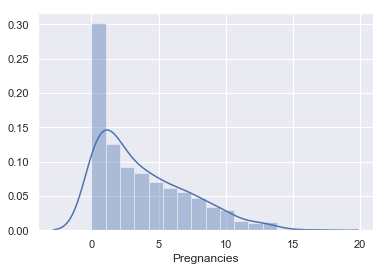

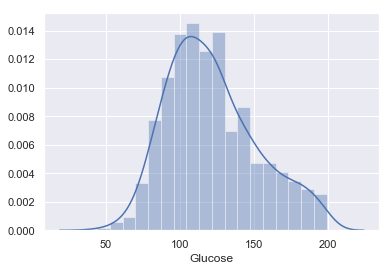

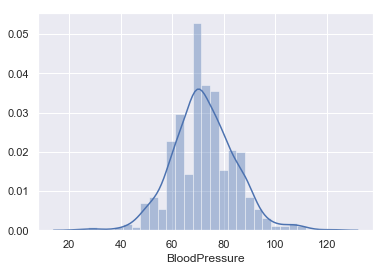

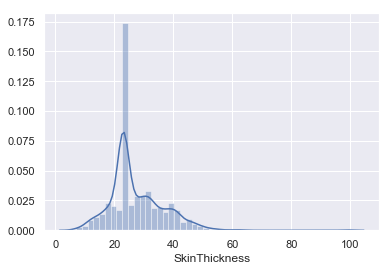

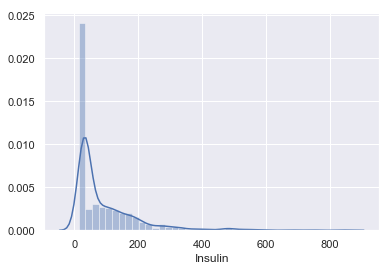

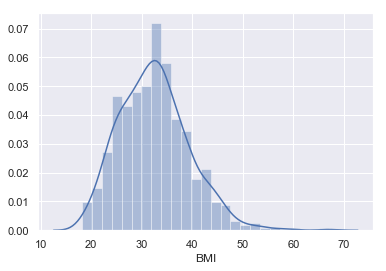

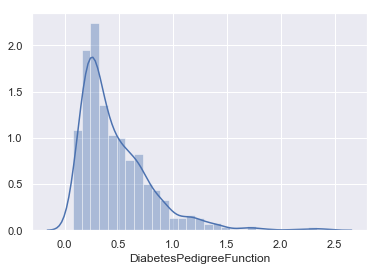

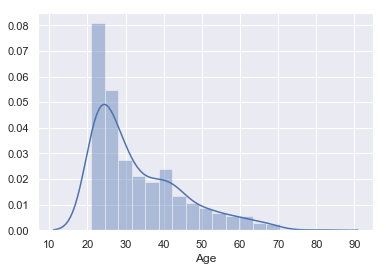

In [12]:
for col in pima_df.columns[:-1]:
    sns.distplot(pima_df[col])
    plt.show()

### Observations after Missing Value Imputation:
1. Pregnancies, Insulin, DiabetesPedigreeFunction , Age seems to be right skewed
2. BloodPresurre and Glucose are normally distribured


### 9. Outliers

Ouliers can be identified using three ways - 
- Visually
- IQR
- z-score

First, Let us plot box plot to check for any outliers in the dataset

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

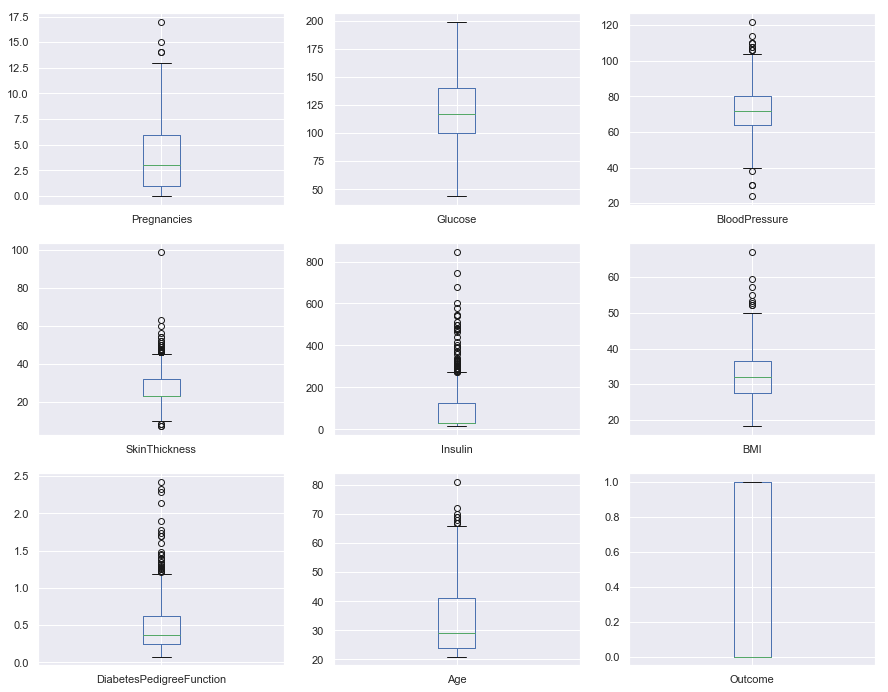

In [13]:
pima_df.plot(kind='box',subplots=True,layout=(3,3), sharex=False, sharey=False, figsize=(15,12))

### Inference

1. There are few outliers in Pregnancies column
2. There are lot of outliers in Insulin, DiabetesPedigreeFunction
3. Ouliers can also be found in SkinThickness, BloodPressure, BMI
4. There are no ouliers in Glucose.


### Strategy to handle outliers:
There are multiple ways in which we can handle outliers - 

- Drop the outliers
- Alternatively, we can impute the oulier values using mean or median, based on the type of dataset that we are deailing with.

### 10. Bivariate Analysis

#### a. Pair Plot

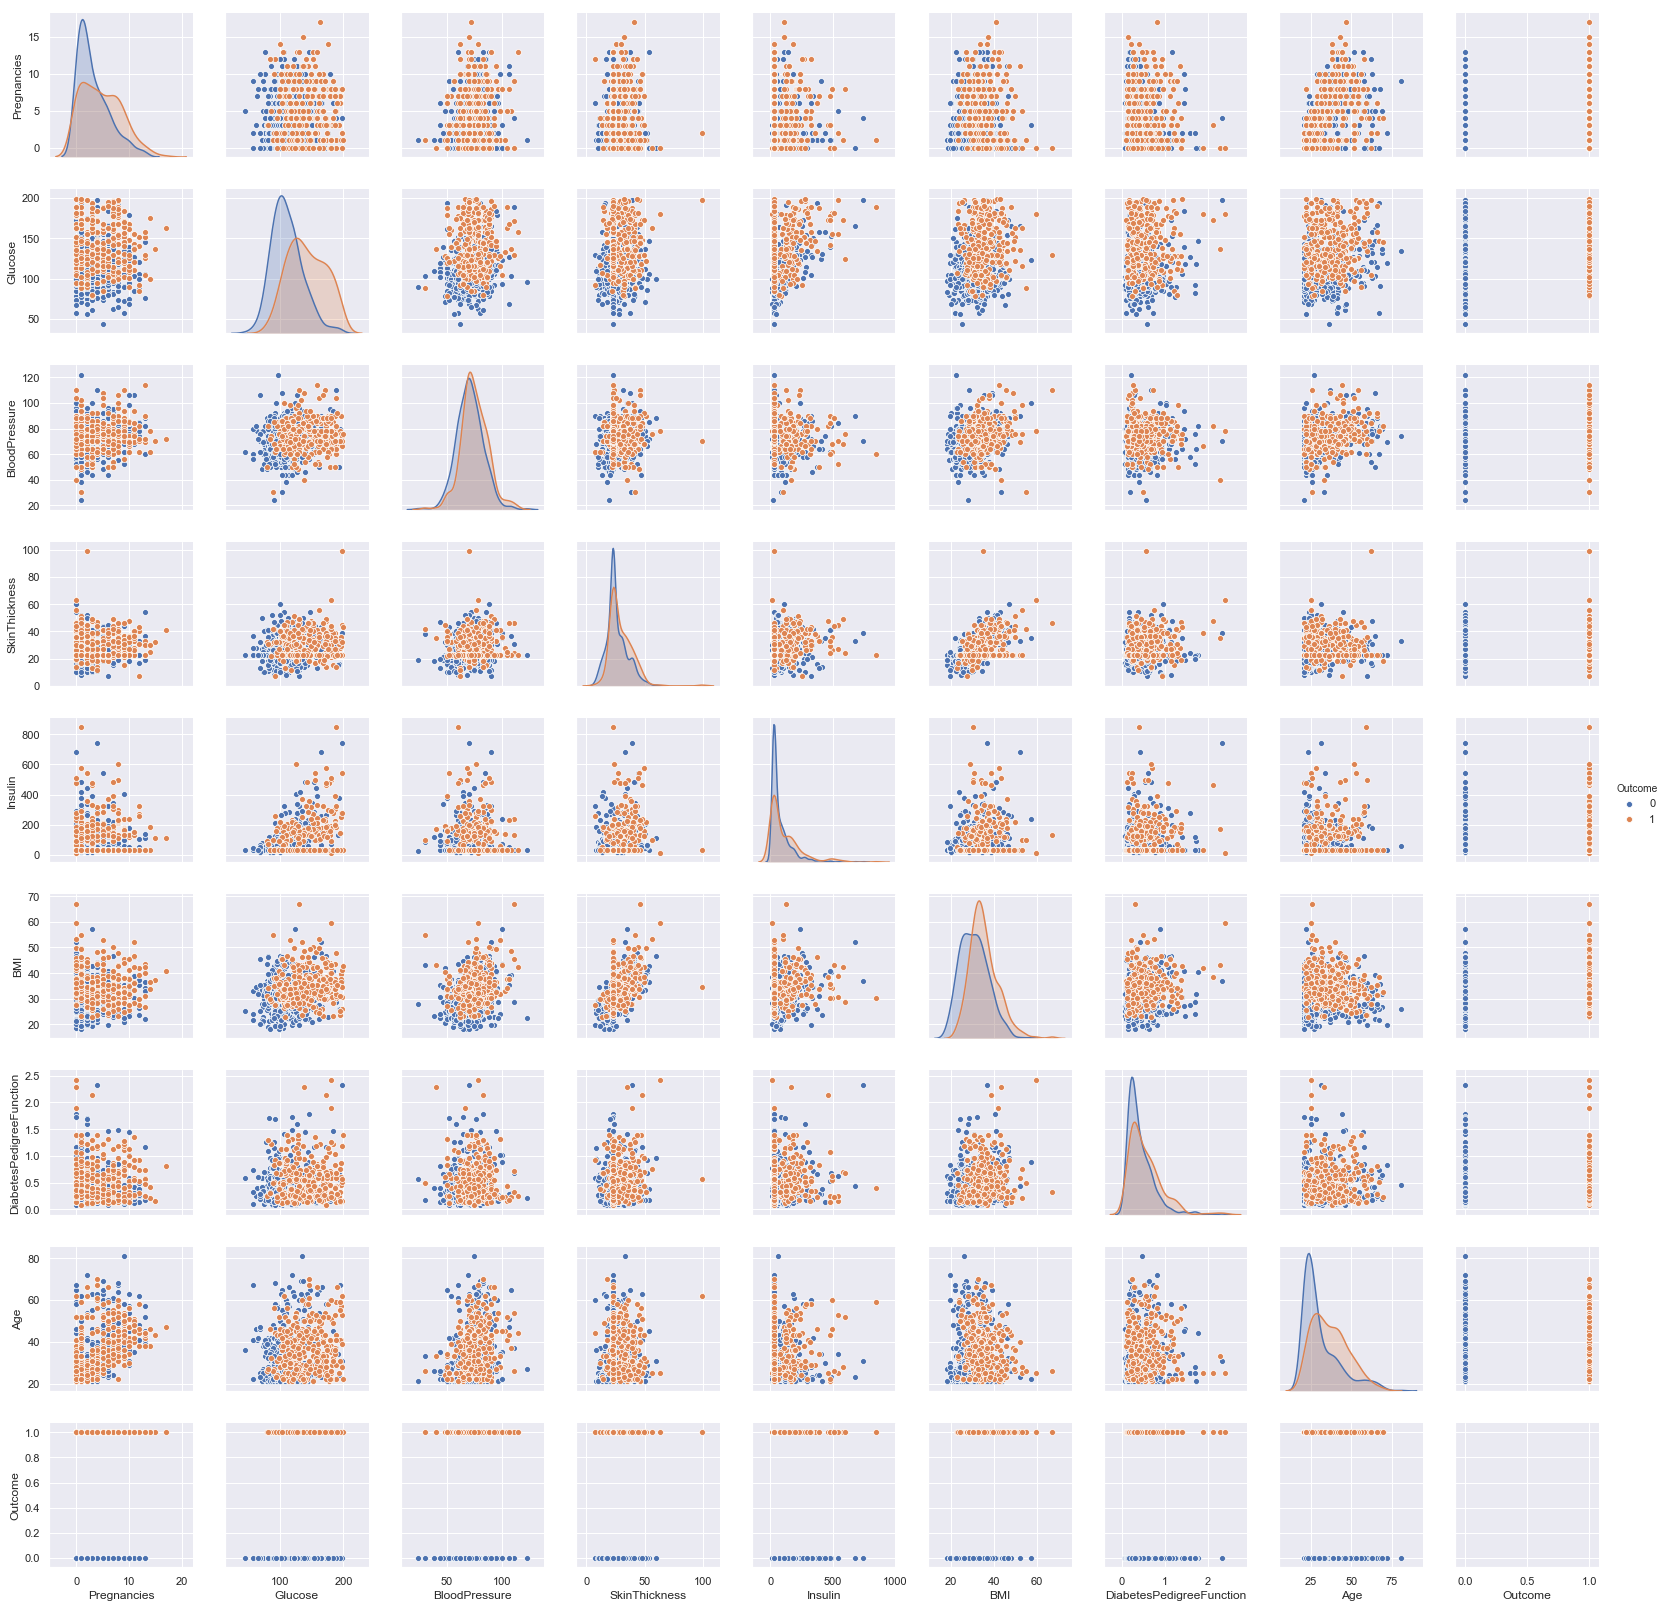

In [16]:
sns.pairplot(data=pima_df,hue='Outcome')

#### Inference:
1. The diagonal shows the distribution of the the dataset with the kde.
2. The scatter-plots shows the relation between each and every attribute or features taken pairwise. Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two outcome-class instances.
3. One other thing that we can deduce from this image is that all the parameters overlap for the Outcome value, i.e., no matter if you are suffering from the diabetes or not, you can have the same parameters. 

##### b. Correlation and Heatmap

In [25]:
df_corr = pima_df.corr()

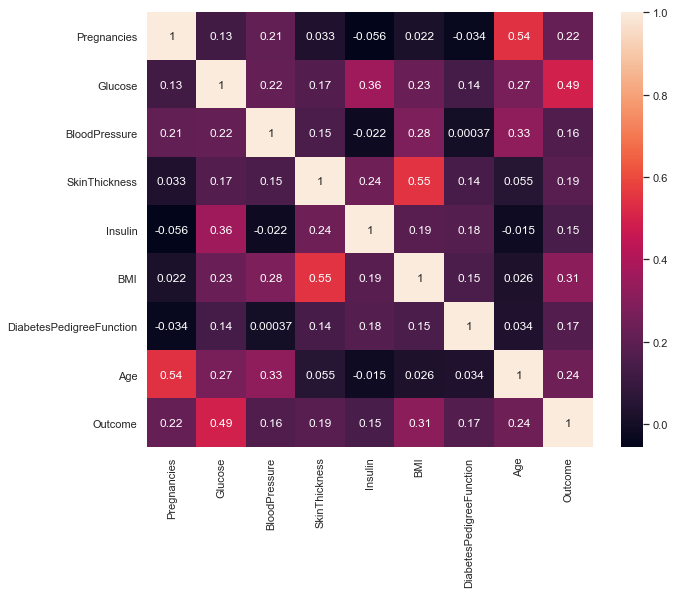

In [26]:
sns.heatmap(df_corr,annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)


### Inference:


1. The heatmap also indicates that there is no strong correlation between any of the variables
2. However, the following pairs has a positive correlation coefficient between them as compared to the other parameters:
      - Pregnancies and Age
      - Insulin and Glucose
      - BMI and Skin thickness
3. And with the Outcome value, Glucose and BMI values related the most. So these are the parameters we need to take special care of. 


### 11. RelationShip of predictors with Target 

Before delving more into the features, let us first have a look at the target variable 'Outcome'

Text(0.5,0,'Outcome')

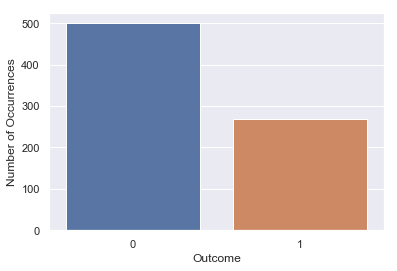

In [14]:
class_variable = pima_df['Outcome'].value_counts()

sns.barplot(class_variable.index,class_variable.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Outcome', fontsize=12)

### Inference :
From the counts looks like there are more  number for rows (data) for non diabetic patients than diabetic. There seems to be imbalance in the class.

### Exploration on the Features against Outcome Variable

#### Q1. Average Age of women among the diabetic patients? Percentage of diabetic women with age > 40 ? Percentage of diabetic women age>35 AND pregnancies>5


In [80]:
print("Average Age of women among the diabetic patients:" , pima_df[pima_df['Outcome']==1].Age.mean())

positive_Age_40 = pima_df[(pima_df['Age'] >= 40) & (pima_df['Outcome'] == 1)].shape[0]/pima_df[pima_df['Outcome'] == 1].shape[0] * 100
print("Percentage of diabetic women with age > 40:", positive_Age_40)

positive = pima_df[(pima_df['Age'] >= 40) & (pima_df['Pregnancies'] >= 5) & (pima_df['Outcome'] == 1)].shape[0]/pima_df[pima_df['Outcome'] == 1].shape[0] * 100
print("Percentage of diabetic women age>35 AND pregnancies>5:", positive)



print("\nAverage Age of women among the non diabetic patients:" , pima_df[pima_df['Outcome']==0].Age.mean())

negative_Age_40 = pima_df[(pima_df['Age'] >= 40) & (pima_df['Outcome'] == 0)].shape[0]/pima_df[pima_df['Outcome'] == 0].shape[0] * 100
print("Percentage of non diabetic women with age > 40:", negative_Age_40)

negative = pima_df[(pima_df['Age'] >= 40) & (pima_df['Pregnancies'] >= 5) & (pima_df['Outcome'] == 0)].shape[0]/pima_df[pima_df['Outcome'] == 0].shape[0] * 100
print("Percentage of non diabetic women age>35 AND pregnancies>5:", negative)

Average Age of women among the diabetic patients: 37.06716417910448
Percentage of diabetic women with age > 40: 40.298507462686565
Percentage of diabetic women age>35 AND pregnancies>5: 30.597014925373134

Average Age of women among the non diabetic patients: 31.19
Percentage of non diabetic women with age > 40: 19.8
Percentage of non diabetic women age>35 AND pregnancies>5: 14.799999999999999


#### Q2. Percentage of diabetic women with pregnancies >= 5 and Q3. Percentage of non diabetic women with pregnancies >= 5

In [83]:

positive_pregnancy_5 = pima_df[(pima_df['Pregnancies'] >= 5) & (pima_df['Outcome'] == 1)].shape[0]/pima_df[pima_df['Outcome'] == 1].shape[0] * 100
print("Percentage of diabetic women with pregnancies >= 5   :", positive_pregnancy_5)

negative_pregnancy_5 = pima_df[(pima_df['Pregnancies'] >= 5) & (pima_df['Outcome'] == 0)].shape[0]/pima_df[pima_df['Outcome'] == 0].shape[0] * 100
print("Percentage of non diabetic women with pregnancies >= 5   :", negative_pregnancy_5)

Percentage of diabetic women with pregnancies >= 5   : 49.25373134328358
Percentage of non diabetic women with pregnancies >= 5   : 28.799999999999997


#### Observation 
- This indicates that there are higher chances of a women having diabetes with Age and higher number of pregnancies

### Histogram plot for features values against positive and negative Outcomes

#### 1. Glucose

Text(0.5,0,'Glucose')

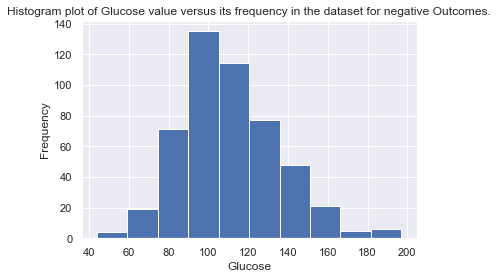

In [97]:
pima_df[pima_df['Outcome']==0]["Glucose"].plot(kind='hist',title='Histogram plot of Glucose value versus its frequency in the dataset for negative Outcomes.')
plt.xlabel("Glucose")

Text(0.5,0,'Glucose')

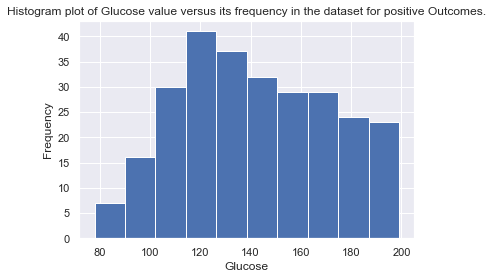

In [98]:
pima_df[pima_df['Outcome']==1]["Glucose"].plot(kind='hist',title='Histogram plot of Glucose value versus its frequency in the dataset for positive Outcomes.')
plt.xlabel("Glucose")

#### 2. Insulin

Text(0.5,0,'Insulin')

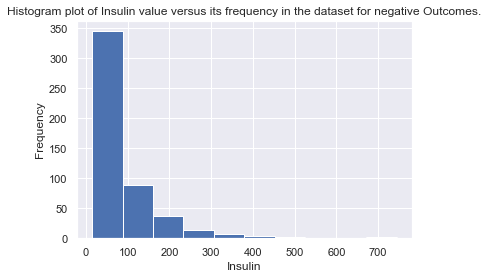

In [99]:
pima_df[pima_df['Outcome']==0]["Insulin"].plot(kind='hist',title='Histogram plot of Insulin value versus its frequency in the dataset for negative Outcomes.')
plt.xlabel("Insulin")

Text(0.5,0,'Insulin')

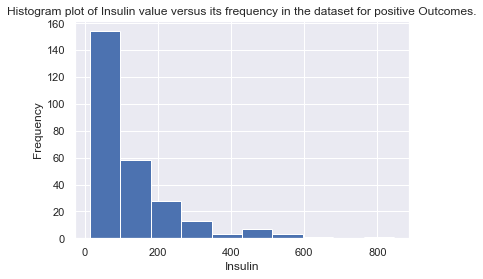

In [100]:
pima_df[pima_df['Outcome']==1]["Insulin"].plot(kind='hist',title='Histogram plot of Insulin value versus its frequency in the dataset for positive Outcomes.')
plt.xlabel("Insulin")

#### 3. BMI

Text(0.5,0,'BMI')

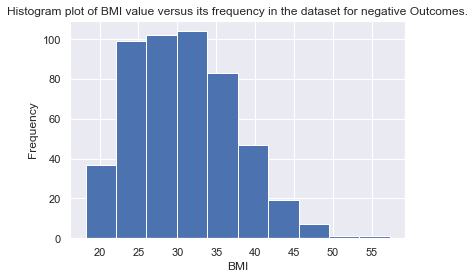

In [101]:
pima_df[pima_df['Outcome']==0]["BMI"].plot(kind='hist',title='Histogram plot of BMI value versus its frequency in the dataset for negative Outcomes.')
plt.xlabel("BMI")

Text(0.5,0,'BMI')

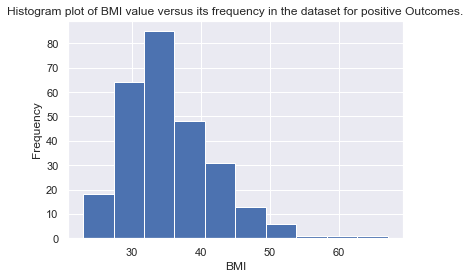

In [102]:
pima_df[pima_df['Outcome']==1]["BMI"].plot(kind='hist',title='Histogram plot of BMI value versus its frequency in the dataset for positive Outcomes.')
plt.xlabel("BMI")

### Create crosstab to check diabetes based on Glucose

def glucose(df):
    if df['Glucose'] >=140:
        val = "Glucose >= 140"
    else: 
        val = "Glucose < 140"
    return val

df = pima_df.copy()
df['glucose_eval'] = df.apply(glucose, axis=1)

print("\033[1m" + "Crosstab -  Percentage of Glucose values based on diabetes" + "\033[0;0m")
pd.crosstab(df.Outcome, df.glucose_eval).apply(lambda r: r/r.sum()*100, axis=1)

In [137]:
print("\033[1m" + "Crosstab -  Count of values in Glucose category for each outcome" + "\033[0;0m")
pd.crosstab(df.Outcome, df.glucose_eval, margins=True).apply(lambda r: r, axis=1)

Crosstab -  Count of values in Glucose category for each outcome


glucose_eval,Glucose < 140,Glucose >= 140,All
Outcome,,,
0,438,62,500
1,133,135,268
All,571,197,768


### Summary
1. There are 9 columns and 768 rows in the dataset
2. All the variables are numerical, there are no categorical variables in the dataset
3. The dataset doesnot have any missing values (NaN).However, there are missing values in terms of 0's in below columns 
    Glucose
    BloodPressure
    SkinThickness
    Insulin
    BMI
4. There is <b> Skewness </b> in some of the fields - Age, DiabetesPedigreeFunction , Pregnancies and Insulin is right skewed.
5. BMI, Blood Pressure, Glucose is have bimodal distribution, however there are few zero values - if we impute those using mean we should be getting normal distribution
6. Skin Thickness also seems to be right skewed and there are zero values - we could use median to impute missing values and get a fairly closer normal distribution
7. There are few <b> Outliers </b> in Pregnancies column and lot of outliers in Insulin, DiabetesPedigreeFunction
8. Ouliers can also be found in SkinThickness, BloodPressure, BMI
9. There are no ouliers in Glucose.
10. Looking at the pair plot, we can say could infer that no two attributes are able to clearly seperate the two outcome-class instances.
11. One other thing that we could deduce is that all the parameters overlap for the Outcome value, i.e., no matter if you are suffering from the diabetes or not, you can have the same parameters. 
12. The heatmap indicates that there is no strong correlation between any of the variables
13. However, the following pairs has a positive correlation coefficient between them as compared to the other parameters:
    Pregnancies and Age
    Insulin and Glucose
    BMI and Skin thickness
14. And with the Outcome value, Glucose and BMI values related the most. So these are the parameters we need to take special care of. 
15. Also, there are more number for rows (data) for non diabetic patients than diabetic. There seems to be imbalance in the class.

The strategy to handle missing values and outliers is been explained above in this notebook.

### End of Basic exploratory Analysis